In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')
plt.rcParams.update({'font.size': 6})
# plt.rc('xlabel', fontsize=8) 
# plt.rc('ylabel', fontsize=8) 

from utils import *
phoebe_c = {'black': "#131313",
             'blue': "#2B71B1",
             'orange': "#FF702F",
             'green': "#22B77F",
             'red': '#F92E3D',
             'purple': '#6D2EB8',
             'pink': "#ED3170",
             'yellow': "#FFCD2F"}

import phoebe
phoebe.interactive_checks_off()
phoebe.interactive_constraints_off()
phoebe.multiprocessing_on()
phoebe.mpi_off()
phoebe.devel_off()
%matplotlib inline

In [2]:
def get_current_values(b, twigs):
    current_values = {}
    for twig in twigs:
        current_values[twig] = b.get_value(twig)
    return current_values

In [3]:
b = phoebe.load('bundles/after_estimators.bundle')

In [4]:
b.add_server('remoteslurm', crimpl_name='terra',
             conda_env='phoebe_2.4dev',
             nprocs=96, install_deps=False, walltime=48,
             server='terra', overwrite=True)

<ParameterSet: 11 parameters | qualifiers: walltime, isolate_env, mail_user, mail_type, use_conda, use_mpi, conda_env, slurm_job_name, nprocs, crimpl_name, install_deps>

In [5]:
print(b['terra'])

ParameterSet: 10 parameters
         crimpl_name@terra@server: terra
           use_conda@terra@server: True
           conda_env@terra@server: phoebe_2.4dev
         isolate_env@terra@server: False
              nprocs@terra@server: 96
             use_mpi@terra@server: True
        install_deps@terra@server: False
      slurm_job_name@terra@server: 
            walltime@terra@server: 48.0 h
           mail_user@terra@server: 


# lc V: NM and DE

In [6]:
b.disable_dataset('rv01')

<ParameterSet: 20 parameters | components: secondary, primary, binary>

### NM: all at once

In [7]:
b.add_solver('optimizer.nelder_mead', 
             solver='opt_nm_full',
             fit_parameters = ['incl@binary', 'teffratio', 'requivratio', 'requivsumfrac', 'esinw', 'ecosw'],
             compute='phoebe01', overwrite=True)
b.set_value('maxiter', solver='opt_nm_full', value=1000)

In [8]:
b.run_solver('opt_nm_full', solution='opt_nm_full_solution', use_server='terra', detach=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.25-12.16.58/*"
# crimpl: ssh terra "mkdir -p ~/crimpl"
# crimpl: scp exportpath.sh terra:~/crimpl/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.05.25-12.16.58/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.05.25-12.16.58"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_tcdrBMwuIchNusjgCMIFYBVkiZdour.py terra:/home/users/angela/crimpl/crimpl-job-2022.05.25-12.16.58/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_tcdrBMwuIchNusjgCMIFYBVkiZdour.py' >> /home/us

<Parameter: detached_job=unknown | keys: description, value, job_name, uniqueid, readonly, advanced, latexfmt>

### DE

In [9]:
b.add_distribution('incl@binary', phoebe.uniform(80,90), distribution='de_bounds')
b.add_distribution('teffratio', phoebe.uniform(0.5,1.5), distribution='de_bounds')
b.add_distribution('requivratio', phoebe.uniform(0.1,1.5), distribution='de_bounds')
b.add_distribution('requivsumfrac', phoebe.uniform(0.01,0.5), distribution='de_bounds')
b.add_distribution('esinw', phoebe.uniform(-0.1,0.3), distribution='de_bounds')
b.add_distribution('ecosw', phoebe.uniform(-0.2,0.2), distribution='de_bounds')

<ParameterSet: 1 parameters>

In [10]:
b.add_solver('optimizer.differential_evolution', 
             solver='opt_de', bounds=['de_bounds',],
             fit_parameters = ['incl@binary','teffratio', 'requivratio', 'requivsumfrac', 'esinw', 'ecosw'],
             compute='phoebe01', overwrite=True)

<ParameterSet: 16 parameters | qualifiers: fit_parameters, use_server, bounds_combine, maxiter, popsize, compute, strategy, tol, atol, comments, expose_lnprobabilities, progress_every_niters, recombination, polish, bounds_sigma, bounds>

In [11]:
b.set_value('maxiter', solver='opt_de', value=1000)
b.set_value('popsize', solver='opt_de', value=60)
b.set_value('polish', False)
b.run_solver('opt_de', solution='opt_de_solution', use_server='terra', detach=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.25-12.18.19/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.05.25-12.18.19/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.05.25-12.18.19"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_tdlIpqZqMPKmkimrMOOcBZNfSFuOnA.py terra:/home/users/angela/crimpl/crimpl-job-2022.05.25-12.18.19/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_tdlIpqZqMPKmkimrMOOcBZNfSFuOnA.py' >> /home/users/angela/crimpl/crimpl-job-2022.05.25-12.18.19/crimpl-input-files.list"
# crimpl: 

<Parameter: detached_job=unknown | keys: description, value, job_name, uniqueid, readonly, advanced, latexfmt>

### NM: sequential

In [12]:
def optimize_params(b, fit_twigs, label, use_server='', plot=True):
    b.add_solver('optimizer.nelder_mead', solver='opt_%s' % label,
                    fit_parameters = fit_twigs, overwrite=True)
    b.set_value('maxiter', solver='opt_%s' % label, value=200)
    b.run_solver('opt_%s' % label, solution='opt_%s_sol' % label, use_server=use_server)
    b.adopt_solution('opt_%s_sol' % label)
    # b.run_checks()
    # b.run_delayed_constraints()
    b.run_compute(model='opt_%s_model' % label)
    if plot:
        b.plot(['dataset', 'opt_%s_model' % label], x='phase', show=True)
    return b

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.25-12.19.37/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.05.25-12.19.37/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.05.25-12.19.37"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_XvOyvwMwIEFhtaIrjCEhwVkeoaVZMM.py terra:/home/users/angela/crimpl/crimpl-job-2022.05.25-12.19.37/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_XvOyvwMwIEFhtaIrjCEhwVkeoaVZMM.py' >> /home/users/angela/crimpl/crimpl-job-2022.05.25-12.19.37/crimpl-input-files.list"
# crimpl: 

100%|████████████████████████████████████████| 458/458 [00:09<00:00, 47.20it/s]
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


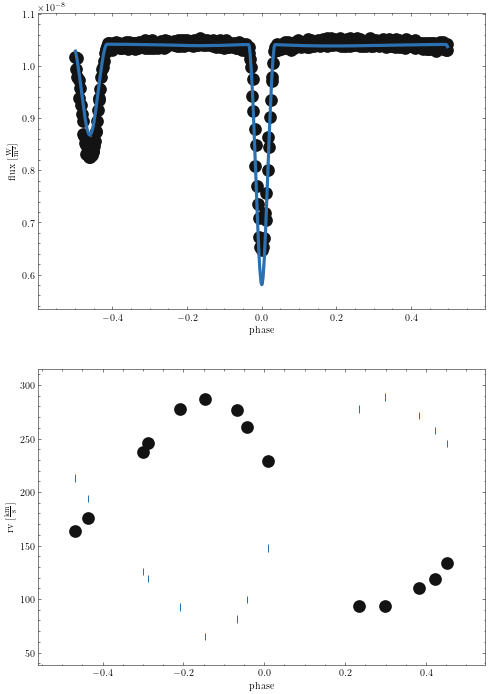

In [13]:
b = optimize_params(b, ['requivsumfrac','incl@binary'], 'rsumincl', use_server='terra', plot=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.25-13.07.54/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.05.25-13.07.54/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.05.25-13.07.54"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_YMUMFHcXgGQCnSHdwZcxuBTnXoLJvl.py terra:/home/users/angela/crimpl/crimpl-job-2022.05.25-13.07.54/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_YMUMFHcXgGQCnSHdwZcxuBTnXoLJvl.py' >> /home/users/angela/crimpl/crimpl-job-2022.05.25-13.07.54/crimpl-input-files.list"
# crimpl: 

100%|████████████████████████████████████████| 458/458 [00:09<00:00, 47.06it/s]
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


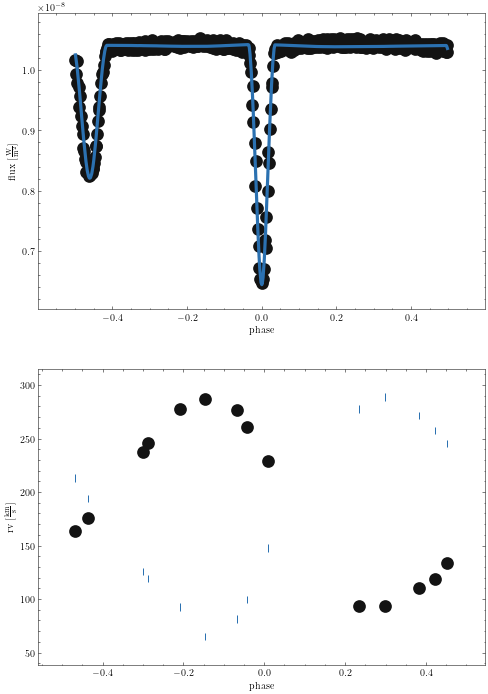

In [14]:
b = optimize_params(b, ['teffratio', 'esinw'], 'teffresw', use_server='terra', plot=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.25-13.18.19/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.05.25-13.18.19/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.05.25-13.18.19"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_msSVRYhjeqKfcaYkHydSnWsQfJJbED.py terra:/home/users/angela/crimpl/crimpl-job-2022.05.25-13.18.19/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_msSVRYhjeqKfcaYkHydSnWsQfJJbED.py' >> /home/users/angela/crimpl/crimpl-job-2022.05.25-13.18.19/crimpl-input-files.list"
# crimpl: 

100%|████████████████████████████████████████| 458/458 [00:09<00:00, 46.95it/s]
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


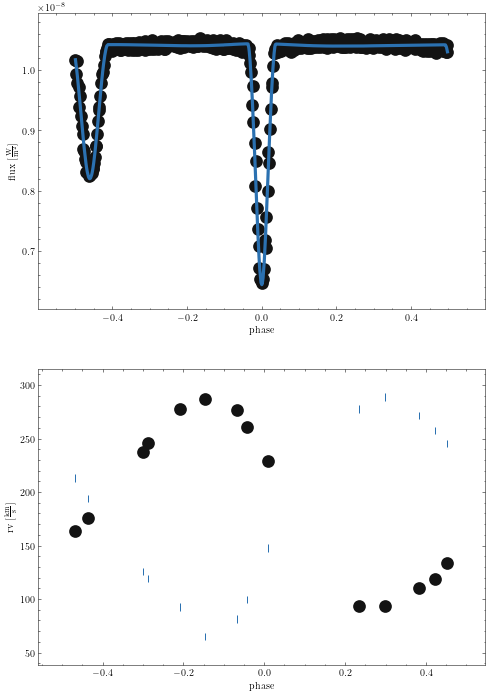

In [15]:
b = optimize_params(b, ['requivsumfrac', 'requivratio', 'teffratio'], 'rsumrrteffr',use_server='terra', plot=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.25-13.39.54/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.05.25-13.39.54/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.05.25-13.39.54"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_RNWUEtQKxqaCHKdXIGPmxWMjYmfxJt.py terra:/home/users/angela/crimpl/crimpl-job-2022.05.25-13.39.54/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_RNWUEtQKxqaCHKdXIGPmxWMjYmfxJt.py' >> /home/users/angela/crimpl/crimpl-job-2022.05.25-13.39.54/crimpl-input-files.list"
# crimpl: 

100%|████████████████████████████████████████| 458/458 [00:09<00:00, 47.72it/s]
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


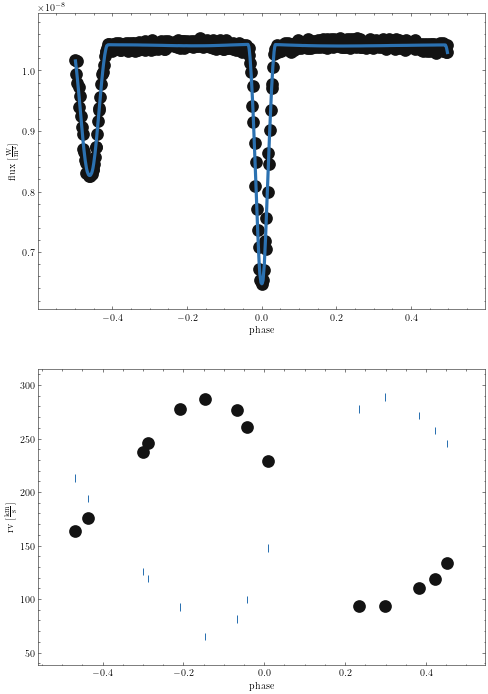

In [16]:
b = optimize_params(b, ['requivsumfrac', 'requivratio', 'teffratio', 'incl@binary', 'esinw', 'ecosw'], 'all', 
                    use_server='terra',  plot=True)

In [17]:
twigs = ['requivsumfrac@component', 'requivratio@component', 'teffratio@component', 'incl@binary@component', 'esinw@component', 'ecosw@component']

In [18]:
residuals_opt_nm_seq = b.calculate_residuals(model='opt_all_model', dataset='lc01')
opt_nm_seq_results = get_current_values(b, twigs)

In [19]:
b.save('bundles/after_optimizers_lc.bundle')

'bundles/after_optimizers_lc.bundle'

In [20]:
b.load_job_progress(solution='opt_nm_full_solution')

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "cat /home/users/angela/crimpl/crimpl-job-2022.05.25-12.16.58/crimpl_slurm_id"
# crimpl: ssh terra "squeue -j 4017"
# crimpl: ssh terra "cat /home/users/angela/crimpl/crimpl-job-2022.05.25-12.16.58/crimpl-job.status"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.25-12.16.58/*"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.25-12.16.58/*"
# crimpl: scp terra:/home/users/angela/crimpl/crimpl-job-2022.05.25-12.16.58/{_tcdrBMwuIchNusjgCMIFYBVkiZdour.out,_tcdrBMwuIchNusjgCMIFYBVkiZdour.out.progress} ./


<ParameterSet: 12 parameters | qualifiers: niter, fitted_twigs, adopt_parameters, success, adopt_values, comments, initial_values, fitted_values, fitted_uniqueids, fitted_units, adopt_distributions, message>

In [21]:
b.adopt_solution('opt_nm_full_solution')
b.run_compute(model='opt_nm_full_model', overwrite=True)
residuals_opt_nm_full = b.calculate_residuals(model='opt_nm_full_model', dataset='lc01')
opt_nm_full_results = get_current_values(b, twigs)

100%|████████████████████████████████████████| 458/458 [00:09<00:00, 47.07it/s]


In [23]:
b.load_job_progress(solution='opt_de_solution')

# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.25-12.18.19/*"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.25-12.18.19/*"
# crimpl: scp terra:/home/users/angela/crimpl/crimpl-job-2022.05.25-12.18.19/_tdlIpqZqMPKmkimrMOOcBZNfSFuOnA.out ./


<ParameterSet: 12 parameters | qualifiers: niter, fitted_twigs, adopt_parameters, success, adopt_values, bounds, comments, fitted_values, fitted_uniqueids, fitted_units, adopt_distributions, message>

In [24]:
b.adopt_solution('opt_de_solution')
b.run_compute(model='opt_de_model')
residuals_opt_de = b.calculate_residuals(model='opt_de_model', dataset='lc01')
opt_de_results = get_current_values(b, twigs)

100%|████████████████████████████████████████| 458/458 [00:09<00:00, 47.87it/s]


In [25]:
b.save('bundles/after_optimizers_lc.bundle')

'bundles/after_optimizers_lc.bundle'

In [26]:
# compare lc optimization models and choose best one to move forward with rv fitting
# save parameter values in a dict for comparison to true values

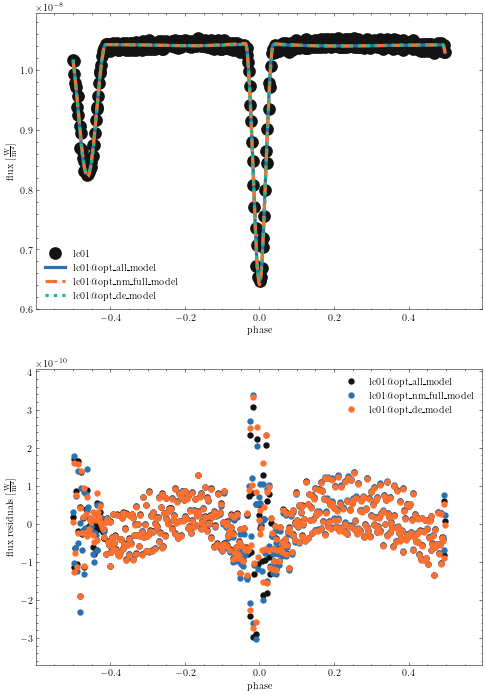

(<autofig.figure.Figure | 2 axes | 7 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [27]:
b.plot(['dataset', 'model'], model=['opt_nm_full_model', 'opt_all_model', 'opt_de_model'], x='phase', legend=True)
b.plot(['dataset', 'model'], model=['opt_nm_full_model', 'opt_all_model', 'opt_de_model'], x='phase', y='residuals', marker='.', legend=True, show=True)

In [28]:
for model, residuals in zip(['opt_nm_full', 'opt_nm_seq', 'opt_de'],[residuals_opt_nm_full, residuals_opt_nm_seq, residuals_opt_de]):
    print(model, np.sum(residuals**2))

opt_nm_full 2.2170470554614306e-18 W2 / m4
opt_nm_seq 2.0780639737539925e-18 W2 / m4
opt_de 2.0543623998695254e-18 W2 / m4


In [29]:
b.adopt_solution('opt_de_solution')

<ParameterSet: 6 parameters | qualifiers: requivratio, requivsumfrac, esinw, incl, ecosw, teffratio>

In [30]:
b.save('bundles/after_optimizers_lc.bundle')

'bundles/after_optimizers_lc.bundle'

# rv: NM

In [31]:
b.enable_dataset('rv01')
b.disable_dataset('lc01')
b.set_value_all('rv_method', context='compute', value = 'dynamical')

In [32]:
b.add_solver('optimizer.nelder_mead', solver='opt_rv_nm', maxiter=1000,
             fit_parameters=['period@binary', 'q@binary', 'asini@binary', 'vgamma@system'])
b.run_solver('opt_rv_nm', solution='opt_rv_nm_sol', use_server='terra')

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.25-19.41.26/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.05.25-19.41.26/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.05.25-19.41.26"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_UrcBxCYMDlBGJaCezFAndnCZWpSLeO.py terra:/home/users/angela/crimpl/crimpl-job-2022.05.25-19.41.26/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_UrcBxCYMDlBGJaCezFAndnCZWpSLeO.py' >> /home/users/angela/crimpl/crimpl-job-2022.05.25-19.41.26/crimpl-input-files.list"
# crimpl: 

<ParameterSet: 12 parameters | qualifiers: niter, fitted_twigs, adopt_parameters, success, adopt_values, comments, initial_values, fitted_values, fitted_uniqueids, fitted_units, adopt_distributions, message>

In [64]:
b.adopt_solution('opt_rv_nm_sol')
b.run_compute(model='opt_rv_nm_model', overwrite=True)
twigs = ['period@binary','q', 'asini@binary', 'vgamma']
opt_nm_rv_results = get_current_values(b, twigs)

100%|████████████████████████████████████████| 472/472 [00:10<00:00, 45.06it/s]


/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


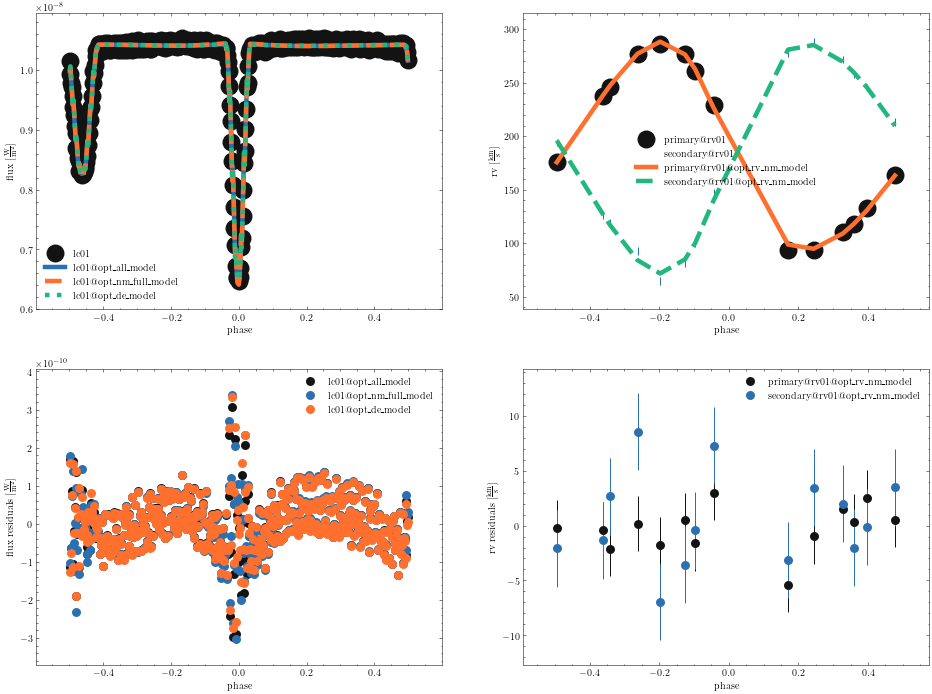

(<autofig.figure.Figure | 4 axes | 13 call(s)>,
 <Figure size 1152x864 with 4 Axes>)

In [34]:
b.plot(['dataset', 'model'], model=['opt_nm_full_model', 'opt_all_model', 'opt_de_model', 'opt_rv_nm_model'], x='phase', legend=True)
b.plot(['dataset', 'model'], model=['opt_nm_full_model', 'opt_all_model', 'opt_de_model', 'opt_rv_nm_model'], x='phase', y='residuals', marker='.', legend=True, show=True)

In [35]:
b.save('bundles/after_optimizers_lc_rv.bundle')

'bundles/after_optimizers_lc_rv.bundle'

# lcB: optimize teff, pblums

In [36]:
b = phoebe.load('bundles/after_optimizers_lc_rv.bundle')

In [37]:
lcB = np.loadtxt('data/lc.B.data')
b.add_dataset('lc', times=lcB[:,0], fluxes=lcB[:,1], sigmas=lcB[:,2], passband='Johnson:B')

<ParameterSet: 47 parameters | contexts: dataset, figure, constraint, compute>

In [38]:
b.enable_dataset('lc01')
b.enable_dataset('lc02')
b.disable_dataset('rv01')

<ParameterSet: 20 parameters | components: secondary, primary, binary>

In [43]:
b.set_value('pblum_mode@lc01', 'component-coupled')
b.set_value('pblum_mode@lc02', 'dataset-coupled')

100%|████████████████████████████████████████| 458/458 [00:10<00:00, 44.25it/s]
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


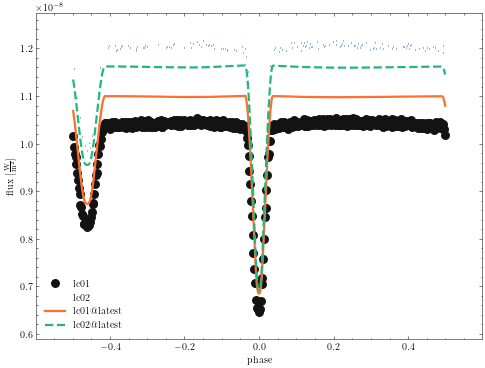

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [56]:
b['teff@primary'] = 6000
b['pblum@primary@lc01'] = 1.1e-7
b.run_compute()
b.plot(x='phase', model='latest', legend=True, show=True)

In [59]:
b.add_solver('optimizer.nelder_mead', solver='opt_teffs', fit_parameters=['teff@primary', 'teffratio', 'pblum@primary@lc01'], 
             maxiter=1000, overwrite=True)
b.run_solver('opt_teffs', solution='opt_teffs_sol', overwrite=True, use_server='terra')

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2022.05.25-20.07.33/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2022.05.25-20.07.33/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2022.05.25-20.07.33"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/phoetting-paper/FINAL_NOTEBOOKS_RESULTS/_SJtkRtozQPPHfJyqchHsUJaCJnZSql.py terra:/home/users/angela/crimpl/crimpl-job-2022.05.25-20.07.33/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_SJtkRtozQPPHfJyqchHsUJaCJnZSql.py' >> /home/users/angela/crimpl/crimpl-job-2022.05.25-20.07.33/crimpl-input-files.list"
# crimpl: 

<ParameterSet: 12 parameters | qualifiers: niter, fitted_twigs, adopt_parameters, success, adopt_values, comments, initial_values, fitted_values, fitted_uniqueids, fitted_units, adopt_distributions, message>

In [60]:
print(b['opt_teffs_sol'])

ParameterSet: 13 parameters
R  detached_job@opt_teffs@opt_...: loaded
   comments@opt_teffs@opt_teff...: 
R  fitted_twigs@opt_teffs@opt_...: ['teff@primary@star@component' 'teffratio@binary@orbit@component'
 'pblum@primary@lc01@lc@dataset']
   adopt_parameters@opt_teffs@...: ['teff@primary@star@component', 'teffratio@binary@orbit@component', 'pblum@primary@lc01@lc@dataset']
   adopt_distributions@opt_tef...: False
   adopt_values@opt_teffs@opt_...: True
R  message@opt_teffs@opt_teffs...: Optimization terminated successfully.
R  niter@opt_teffs@opt_teffs_s...: 84
R  success@opt_teffs@opt_teffs...: True
R  initial_values@opt_teffs@op...: [6000.0 0.9049310159484693 1.1e-07]
R  fitted_values@opt_teffs@opt...: [6336.632287076376 0.8989138366621553 1.0436574508875918e-07]
R  fitted_units@opt_teffs@opt_...: ['K' '' 'W']
   comments@phoebe01@opt_teffs...: 


100%|████████████████████████████████████████| 472/472 [00:10<00:00, 45.08it/s]
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,
/Users/angela/miniconda3/envs/phoebe_2.4/lib/python3.9/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


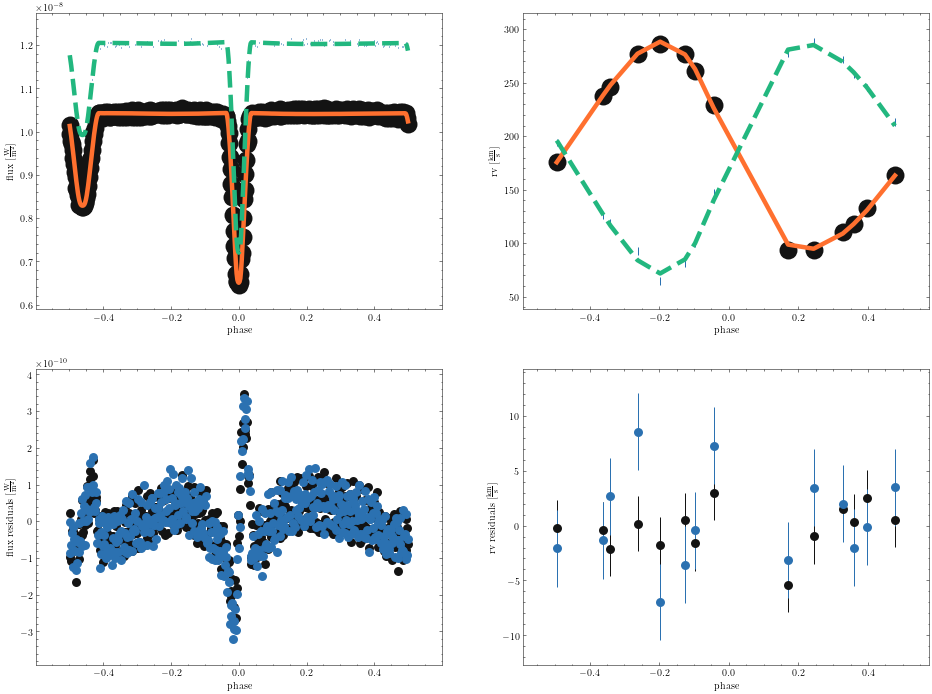

(<autofig.figure.Figure | 4 axes | 12 call(s)>,
 <Figure size 1152x864 with 4 Axes>)

In [65]:
b.adopt_solution('opt_teffs_sol')
b.enable_dataset('rv01')
b.run_compute()
b.plot(['dataset', 'model'], model='latest',  x='phase')
b.plot(['dataset', 'model'], model='latest', x='phase', y='residuals', marker='.', show=True)

In [66]:
twigs = ['teff@primary']
opt_teffs_results = get_current_values(b, twigs)

In [67]:
b.save('bundles/after_optimizers.bundle')

'bundles/after_optimizers.bundle'

# Plot results

In [68]:
#TODO

In [69]:
b.solutions

['lcperiod_bls_sol',
 'lcperiod_ls_sol',
 'rvperiod_sol',
 'lc_soln_ebai_mlp',
 'lc_soln_ebai_knn',
 'lc_soln_lcgeom',
 'rvgeom_sol',
 'opt_nm_full_solution',
 'opt_de_solution',
 'opt_rsumincl_sol',
 'opt_teffresw_sol',
 'opt_rsumrrteffr_sol',
 'opt_all_sol',
 'opt_rv_nm_sol',
 'opt_teffs_sol']

In [70]:
b.models

['ebai_mlp_model',
 'ebai_knn_model',
 'lc_geometry_model',
 'rvgeom_model2',
 'rvgeom_model',
 'opt_rsumincl_model',
 'opt_teffresw_model',
 'opt_rsumrrteffr_model',
 'opt_all_model',
 'opt_nm_full_model',
 'opt_de_model',
 'opt_rv_nm_model',
 'latest']

In [71]:
times = b.get_value('times', context='dataset', dataset='lc01')
phases = b.to_phase(times)
fluxes_true_V = b.get_value('fluxes', context='dataset', dataset='lc01')
sigmas_true_V = b.get_value('sigmas', context='dataset', dataset='lc01')
fluxes_true_B = b.get_value('fluxes', context='dataset', dataset='lc02')
sigmas_true_B = b.get_value('sigmas', context='dataset', dataset='lc02')

times_rv = b.get_value('times', context='dataset', component='primary', dataset='rv01')
phases_rv = b.to_phase(times_rv)
rvs1 = b.get_value('rvs', context='dataset', component='primary', dataset='rv01')
rvs2 = b.get_value('rvs', context='dataset', component='secondary', dataset='rv01')
sigmas1 = b.get_value('sigmas', context='dataset', component='primary', dataset='rv01')
sigmas2 = b.get_value('sigmas', context='dataset', component='secondary', dataset='rv01')

In [72]:
lc_nm_full = get_model(b, model='opt_nm_full_model', dataset='lc01', phase_order=True)
lc_nm_seq = get_model(b, model='opt_all_model', dataset='lc01', phase_order=True)
lc_de = get_model(b, model='opt_de_model', dataset='lc01', phase_order=True)
lc_teffs_V = get_model(b, model='latest', dataset='lc01', phase_order=True)
lc_teffs_B = get_model(b, model='latest', dataset='lc02', phase_order=True)
rv_nm1, rv_nm2 = get_model(b, model='opt_rv_nm_model', dataset='rv01', model_type='rv', phase_order=True)

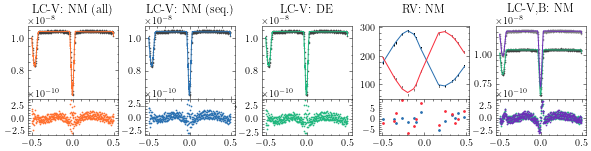

In [74]:
fig, ((ax1, ax1b, ax2, ax3, ax2b), (ax4, ax4b, ax5, ax6, ax5b)) = plt.subplots(nrows = 2, ncols = 5, figsize=(10,2), 
                                                       gridspec_kw={'height_ratios': [2, 1]})

fig.subplots_adjust(hspace=0, wspace=0.3)
lcV_datapoints = {'fmt': '.', 'ms': 1, 'c': '0.25', 'zorder':0,}
lcB_datapoints = {'fmt': '.', 'ms': 1, 'c': '0.5', 'zorder':0,}
rv1_datapoints = {'fmt': ',', 'c': '0.0', 'zorder':0}
rv2_datapoints = {'fmt': ',', 'c': '0.5',  'zorder':0}
model_kwargs = {'lw': 1, 'zorder': 1}
res_kwargs = {'s': 0.5}
res_rv_kwargs = {'s': 3}
for ax in [ax1, ax1b, ax2, ax2b]:
    ax.errorbar(x=phases, y=fluxes_true_V, yerr=sigmas_true_V, rasterized=True, **lcV_datapoints)
ax2b.errorbar(x=phases, y=fluxes_true_B, yerr=sigmas_true_B, rasterized=True, **lcB_datapoints)

ax3.errorbar(x=phases_rv, y=rvs1, yerr=sigmas1, rasterized=True, **rv1_datapoints)
ax3.errorbar(x=phases_rv, y=rvs2, yerr=sigmas2, rasterized=True, **rv2_datapoints)

ax1.plot(lc_nm_full[:,1], lc_nm_full[:,2], c=phoebe_c['orange'], **model_kwargs)
ax4.scatter(lc_nm_full[:,1], lc_nm_full[:,3], c=phoebe_c['orange'], **res_kwargs)
ax1b.plot(lc_nm_seq[:,1], lc_nm_seq[:,2], c=phoebe_c['blue'], **model_kwargs)
ax4b.scatter(lc_nm_seq[:,1], lc_nm_seq[:,3], c=phoebe_c['blue'], **res_kwargs)
ax2.plot(lc_de[:,1], lc_de[:,2],c=phoebe_c['green'], **model_kwargs)
ax5.scatter(lc_de[:,1], lc_de[:,3], c=phoebe_c['green'], **res_kwargs)

ax2b.plot(lc_teffs_V[:,1], lc_teffs_V[:,2], c=phoebe_c['green'], **model_kwargs)
ax2b.plot(lc_teffs_B[:,1], lc_teffs_B[:,2], c=phoebe_c['purple'], **model_kwargs)
ax5b.scatter(lc_teffs_V[:,1], lc_teffs_V[:,3], c=phoebe_c['green'], **res_kwargs)
ax5b.scatter(lc_teffs_B[:,1], lc_teffs_B[:,3], c=phoebe_c['purple'], **res_kwargs)

ax3.plot(rv_nm1[:,1], rv_nm1[:,2], c=phoebe_c['blue'], label='primary', **model_kwargs)
ax3.plot(rv_nm2[:,1], rv_nm2[:,2], c=phoebe_c['red'], label='secondary', **model_kwargs)
ax6.scatter(rv_nm1[:,1], rv_nm1[:,3], c=phoebe_c['blue'], **res_rv_kwargs)
ax6.scatter(rv_nm2[:,1], rv_nm2[:,3], c=phoebe_c['red'],**res_rv_kwargs)

# ax3.legend()

for ax in [ax1, ax2, ax3, ax2b]:
    ax.set_xticks([])
# for ax in [ax4, ax5, ax6]:
#     ax.set_xlabel('Phase')
# ax1.set_ylabel('Flux [W/m$^2$]')
# ax2.set_ylabel('Flux [W/m$^2$]', labelpad=12)
# ax3.set_ylabel('RV [km/s]')
# ax4.set_ylabel('Residuals [W/m$^2$]')
# ax5.set_ylabel('Residuals [W/m$^2$]')
# ax6.set_ylabel('Residuals [km/s]')

ax1.set_title('LC-V: NM (all)', pad=14)
ax1b.set_title('LC-V: NM (seq.)', pad=14)
ax2.set_title('LC-V: DE', pad=14)
ax3.set_title('RV: NM', pad=14)
ax2b.set_title('LC-V,B: NM', pad=14)

# fig.tight_layout()
fig.savefig('figs/4_optimizers_data.pdf', dpi=300)

## parameter values

In [84]:
truths, twigs_true, labels = get_truths_labels()
true_vals = {}
for twig, value in zip(twigs_true, truths):
    true_vals[twig] = value  

In [88]:
twigs_true

['incl@binary',
 'teffratio',
 'requivratio',
 'requivsumfrac',
 'esinw',
 'ecosw',
 'q',
 'asini@binary',
 'vgamma',
 'teff@primary',
 'pblum@primary@lc01',
 'pblum@primary@lc02',
 'period@binary',
 't0_supconj@binary',
 'gravb_bol@primary',
 'gravb_bol@secondary',
 'irrad_frac_refl_bol@primary',
 'irrad_frac_refl_bol@secondary']

model, twig, current_solution, previous_lc, previous_rv


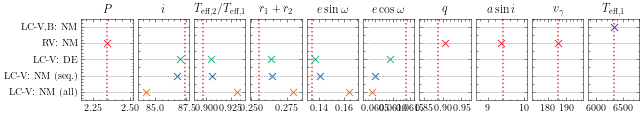

In [93]:
twigs = [
    'period@binary',
    'incl@binary@component',
     'teffratio@component',
     'requivsumfrac@component',
     'esinw@component',
     'ecosw@component',
     'q',
     'asini@binary',
     'vgamma',
    'teff@primary'
]

twigs_true = [
    'period@binary',
    'incl@binary',
     'teffratio',
     'requivsumfrac',
     'esinw',
     'ecosw',
     'q',
     'asini@binary',
     'vgamma',
    'teff@primary'
]

labels = [
        r'$P$',
          r'$i$', 
          r'$T_{\mathrm{eff},2}/T_{\mathrm{eff},1}$', 
          r'$r_1+r_2$', 
          r'$e\sin\omega$', 
          r'$e\cos\omega$',
          r'$q$',
          r'$a\sin i$',
          r'$v_{\gamma}$',
          r'$T_{\mathrm{eff},1}$'
         ]

fig, axes = plt.subplots(nrows = 1, ncols = len(labels), figsize=(10,1.5))
fig.subplots_adjust(hspace=0, wspace=0.1)

models = [opt_nm_full_results, opt_nm_seq_results, opt_de_results, opt_nm_rv_results, opt_teffs_results]
model_labels = [r'LC-V: NM (all)', r'LC-V: NM (seq.)', r'LC-V: DE', r'RV: NM', r'LC-V,B: NM']
colors = [phoebe_c['orange'], phoebe_c['blue'], phoebe_c['green'], phoebe_c['red'], phoebe_c['purple']]
# import cmasher as cmr
# colors = cmr.take_cmap_colors('cmr.rainforest', len(models), cmap_range=(0.05, 0.85), return_fmt='hex')
print('model, twig, current_solution, previous_lc, previous_rv')
for ax, label, twig, twig_true in zip(axes, labels, twigs, twigs_true):
    ax.set_title(label)
    # ax.set_ylabel(ylabel)
    # ax.set_yticks([])
    ax.margins(0.25)
    for i, model in enumerate(models):
        ax.axhline(i, linestyle='--', lw=0.5, color='gray')
        if twig in model.keys():
            # print(model_labels[i], twig, model[twig], b_prev_lc.get_value(twig), b_prev_rv.get_value(twig))
            ax.scatter(model[twig], i, c=colors[i], s=50, marker='x', zorder=1)
            # ax.scatter(b_prev_lc.get_value(twig), i, marker='o', fc='gray', ec='none')
            # ax.scatter(b_prev_rv.get_value(twig), i, marker='o', fc='none', ec='gray')
        else:
            pass
    ax.axvline(x=true_vals[twig_true], ls=':', lw=1.5, c=phoebe_c['red'], zorder=0)
    ax.set_ylim(-0.5, len(models)-1+0.5)
        
for i,ax in enumerate(axes):
    # ax.grid(visible=True, which='major', axis='y', linestyle='--')
    if i==0:
        ax.set_yticks(np.arange(0,len(model_labels),1),model_labels)
    else:
        ax.yaxis.set_ticklabels([])
# fig.tight_layout()
fig.savefig('figs/5_optimizers_vals.pdf', dpi=300)

In [95]:
b

<PHOEBE Bundle: 764 parameters | contexts: solution, model, setting, constraint, server, compute, dataset, figure, system, solver, component, distribution>

In [96]:
b['pblum@primary@lc01']

<Parameter: pblum=1.0436574508875918e-07 W | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>